In [1]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

import pandas as pd

In [16]:
YEAR = 2019
COUNTRY = 'country '
GDP_INDICATOR = 'NY.GDP.MKTP.CD'
gdp = pd.read_csv('GDP2019.csv')

LIFE_INDICATOR = 'SP.DYN.LE00.IN'
life = pd.read_csv('Expectancy2019.csv')
life.head()

,country,year,SP.DYN.LE00.IN
0,Aruba,2019,76.293
1,Afghanistan,2019,64.833
2,Angola,2019,61.147
3,Albania,2019,78.573
4,Andorra,2019,NaN


In [17]:
gdp.head()

,country,year,NY.GDP.MKTP.CD
0,Aruba,2019,NaN
1,Afghanistan,2019,1.929110e+10
2,Angola,2019,8.881570e+10
3,Albania,2019,1.527918e+10
4,Andorra,2019,3.154058e+09


In [18]:
gdpCountries = gdp.dropna()
lifeCountries = life.dropna()

In [19]:
lifeCountries.head()

,country,year,SP.DYN.LE00.IN
0,Aruba,2019,76.29300
1,Afghanistan,2019,64.83300
2,Angola,2019,61.14700
3,Albania,2019,78.57300
5,Arab World,2019,71.98971


In [20]:
gdpCountries.head()

,country,year,NY.GDP.MKTP.CD
1,Afghanistan,2019,1.929110e+10
2,Angola,2019,8.881570e+10
3,Albania,2019,1.527918e+10
4,Andorra,2019,3.154058e+09
5,Arab World,2019,2.820000e+12


In [21]:
def roundToMillions (value):
    return round(value / 1000000)

def usdToGBP (usd):
    return usd / 1.564768

GDP = 'GDP (£m)'
gdpCountries[GDP] = gdpCountries[GDP_INDICATOR].apply(usdToGBP).apply(roundToMillions)
gdpCountries.head()

<ipython-input-21-807019d50449>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdpCountries[GDP] = gdpCountries[GDP_INDICATOR].apply(usdToGBP).apply(roundToMillions)


,country,year,NY.GDP.MKTP.CD,GDP (£m)
1,Afghanistan,2019,1.929110e+10,12328
2,Angola,2019,8.881570e+10,56760
3,Albania,2019,1.527918e+10,9765
4,Andorra,2019,3.154058e+09,2016
5,Arab World,2019,2.820000e+12,1802184


In [11]:
print(gdpCountries.columns.tolist())

['country ', 'year', 'NY.GDP.MKTP.CD', 'GDP (£m)']


In [22]:
headings = [COUNTRY, GDP]
gdpClean = gdpCountries[headings]
gdpClean.head()

,country,GDP (£m)
1,Afghanistan,12328
2,Angola,56760
3,Albania,9765
4,Andorra,2016
5,Arab World,1802184


In [23]:
LIFE = 'Life expectancy (years)'
lifeCountries[LIFE] = lifeCountries[LIFE_INDICATOR].apply(round)
headings = [COUNTRY, LIFE]
lifeClean = lifeCountries[headings]
lifeClean.head()

<ipython-input-23-62070c039e83>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lifeCountries[LIFE] = lifeCountries[LIFE_INDICATOR].apply(round)


,country,Life expectancy (years)
0,Aruba,76
1,Afghanistan,65
2,Angola,61
3,Albania,79
5,Arab World,72


In [25]:
gdpVsLife = pd.merge(gdpClean, lifeClean, on=COUNTRY, how='inner')
gdpVsLife.head()

,country,GDP (£m),Life expectancy (years)
0,Afghanistan,12328,65
1,Angola,56760,61
2,Albania,9765,79
3,Arab World,1802184,72
4,United Arab Emirates,269049,78


In [26]:
from scipy.stats import spearmanr

gdpColumn = gdpVsLife[GDP]
lifeColumn = gdpVsLife[LIFE]
(correlation, pValue) = spearmanr(gdpColumn, lifeColumn)
print('The correlation is', correlation)
if pValue < 0.05:
    print('It is statistically significant.')
else:
    print('It is not statistically significant.')

The correlation is 0.3577369232373251
It is statistically significant.


<AxesSubplot:xlabel='GDP (£m)', ylabel='Life expectancy (years)'>

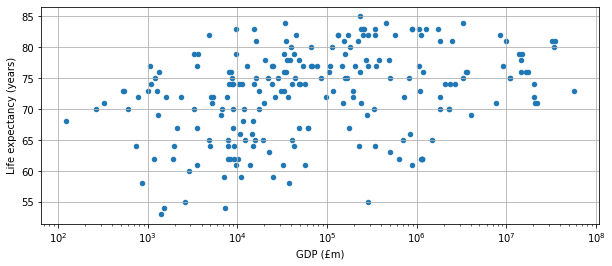

In [27]:
%matplotlib inline
gdpVsLife.plot(x=GDP, y=LIFE, kind='scatter', grid=True, logx=True, figsize=(10, 4))

In [28]:
gdpVsLife.sort_values(GDP).head(10)

,country,GDP (£m),Life expectancy (years)
105,Kiribati,124,68
184,Sao Tome and Principe,268,70
199,Tonga,327,71
212,St. Vincent and the Grenadines,527,73
216,Samoa,545,73
214,Vanuatu,597,70
40,Comoros,745,64
76,Grenada,774,72
73,Guinea-Bissau,856,58
177,Solomon Islands,1016,73


In [29]:
gdpVsLife.sort_values(LIFE).head(10)

,country,GDP (£m),Life expectancy (years)
29,Central African Republic,1419,53
120,Lesotho,1519,54
191,Chad,7231,54
147,Nigeria,286304,55
178,Sierra Leone,2634,55
73,Guinea-Bissau,856,58
35,Cote d'Ivoire,37411,58
134,Mali,11043,59
74,Equatorial Guinea,7047,59
36,Cameroon,24929,59


In [37]:
gdpVsLife.max()

country                    Zimbabwe
GDP (£m)                   56046647
Life expectancy (years)          85
dtype: object

In [34]:
gdpVsLife.min()

country                    Afghanistan
GDP (£m)                           124
Life expectancy (years)             53
dtype: object

In [38]:
gdpVsLife.describe()

,GDP (£m),Life expectancy (years)
count,2.220000e+02,222.000000
mean,2.078341e+06,72.563063
std,6.546319e+06,7.215060
min,1.240000e+02,53.000000
25%,9.168500e+03,67.000000
50%,4.870250e+04,74.000000
75%,5.051865e+05,77.750000
max,5.604665e+07,85.000000


In [52]:
gdp10 = gdpVsLife.sort_values(GDP, ascending=False).head(10) 
gdp10

,country,GDP (£m),Life expectancy (years)
215,World,56046647,73
79,High income,35212888,81
153,OECD members,34318186,80
167,Post-demographic dividend,32464877,81
87,IDA & IBRD total,21664553,71
119,Low & middle income,20833759,71
132,Middle income,20514223,72
86,IBRD only,20130780,74
53,East Asia & Pacific,17191047,76
208,Upper middle income,16424160,76


In [53]:
life10 = gdpVsLife.sort_values(LIFE, ascending=False).head(10)
life10

,country,GDP (£m),Life expectancy (years)
80,"Hong Kong SAR, China",233900,85
32,Switzerland,449268,84
125,"Macao SAR, China",34420,84
100,Japan,3246488,84
97,Italy,1278145,83
188,Sweden,339347,83
59,Spain,888311,83
176,Singapore,237735,83
66,France,1738277,83
95,Iceland,15458,83


In [54]:
gdplast = gdpVsLife.sort_values(GDP).tail(10)
gdplast

,country,GDP (£m),Life expectancy (years)
208,Upper middle income,16424160,76
53,East Asia & Pacific,17191047,76
86,IBRD only,20130780,74
132,Middle income,20514223,72
119,Low & middle income,20833759,71
87,IDA & IBRD total,21664553,71
167,Post-demographic dividend,32464877,81
153,OECD members,34318186,80
79,High income,35212888,81
215,World,56046647,73


In [56]:
lifelast = gdpVsLife.sort_values(LIFE).tail(10)
lifelast

,country,GDP (£m),Life expectancy (years)
66,France,1738277,83
106,"Korea, Rep.",1054469,83
150,Norway,257546,83
97,Italy,1278145,83
176,Singapore,237735,83
135,Malta,9579,83
100,Japan,3246488,84
125,"Macao SAR, China",34420,84
32,Switzerland,449268,84
80,"Hong Kong SAR, China",233900,85


In [57]:
lifelastList = lifelast[COUNTRY].tolist()
life10List = life10[COUNTRY].tolist()
print(set(lifelastList) ^ set(life10List))

{'Sweden', 'Spain', 'Korea, Rep.', 'Norway', 'Malta', 'Iceland'}


In [65]:
gdp10vslife10 = pd.merge(gdp10, life10,on=COUNTRY,how='left')
gdp10vslife10 

,country,GDP (£m)_x,Life expectancy (years)_x,GDP (£m)_y,Life expectancy (years)_y
0,World,56046647,73,NaN,NaN
1,High income,35212888,81,NaN,NaN
2,OECD members,34318186,80,NaN,NaN
3,Post-demographic dividend,32464877,81,NaN,NaN
4,IDA & IBRD total,21664553,71,NaN,NaN
5,Low & middle income,20833759,71,NaN,NaN
6,Middle income,20514223,72,NaN,NaN
7,IBRD only,20130780,74,NaN,NaN
8,East Asia & Pacific,17191047,76,NaN,NaN
9,Upper middle income,16424160,76,NaN,NaN


In [66]:
pd.merge(gdplast, lifelast, on=COUNTRY,how='right')

,country,GDP (£m)_x,Life expectancy (years)_x,GDP (£m)_y,Life expectancy (years)_y
0,France,NaN,NaN,1738277,83
1,"Korea, Rep.",NaN,NaN,1054469,83
2,Norway,NaN,NaN,257546,83
3,Italy,NaN,NaN,1278145,83
4,Singapore,NaN,NaN,237735,83
5,Malta,NaN,NaN,9579,83
6,Japan,NaN,NaN,3246488,84
7,"Macao SAR, China",NaN,NaN,34420,84
8,Switzerland,NaN,NaN,449268,84
9,"Hong Kong SAR, China",NaN,NaN,233900,85


In [62]:
gdpVsLife[(gdpVsLife[GDP] > 10E4) & (gdpVsLife[LIFE] < 60)]

,country,GDP (£m),Life expectancy (years)
147,Nigeria,286304,55
